In [1]:
#imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats
import sklearn
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# import cleaned data.

data = pd.read_csv('cleaned_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_in_years             296 non-null    int64  
 1   gender                   296 non-null    int64  
 2   chest_pain_type          296 non-null    int64  
 3   resting_blood_pressure   296 non-null    int64  
 4   resting_ecg_results      296 non-null    int64  
 5   max_heart_rate_achieved  296 non-null    int64  
 6   exercise_induced_angina  296 non-null    int64  
 7   st_depression            296 non-null    float64
 8   peak_exercise_st_slope   296 non-null    int64  
 9   num_major_vessels        296 non-null    int64  
 10  thalassemia              296 non-null    int64  
 11  disease_presence         296 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 27.9 KB


# machine learning and classification methods to use:

## we will be plotting ROC curve, the decision tree, feature importance matrix, and confusion matrix.

## 1. Logistic Regression:

Logistic Regression is a simple and interpretable algorithm that works well for binary classification problems.
It's computationally efficient and less prone to overfitting, especially with smaller datasets.
It provides probabilistic predictions, making it easy to interpret the certainty of predictions.

Since our dataset is not as large at 296, we will use this as it is resistant to overfitting.

## 2. Random Forest:
Random Forest is an ensemble learning algorithm that combines multiple decision trees to improve performance.
It's robust to outliers and noise in the data and can handle both categorical and numerical features effectively.
Random Forest tends to perform well out-of-the-box and requires minimal hyperparameter tuning.

As we are not very familiar with hyperparameter tuning, we also want to explore this option as our lack of experience will be made up for using this method.

## 3. Support Vector Machines (SVM):
SVM is a powerful algorithm for binary classification that finds the optimal hyperplane separating the classes.
It's effective in high-dimensional spaces and is particularly useful when the number of features exceeds the number of samples.
SVM can handle non-linear decision boundaries using kernel tricks, but it may be less interpretable compared to simpler algorithms like Logistic Regression.

We believe this is useful as high-dimensional space is currently our case with 11 features that are statistically significant.

# Logistic Regression and its code:

logistic regression creates a function related to f(x) = 1/(1+e^-x), where x are the parameters and output is a probability. This model predicts a class by finding its related probability of inputed data.

the goal is to predict the probability of a particular binary outcome.

It predicts probability that a node belongs to that binary class.

In [3]:
data.head()
data.info()
continuous_features = ['age_in_years', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression']
categorical_features = ['gender', 'chest_pain_type',  'resting_ecg_results', 'exercise_induced_angina', 'peak_exercise_st_slope', 'num_major_vessels', 'thalassemia']

binary_categorical_variables = ['gender', 'fasting_blood_sugar','exercise_induced_angina']
multi_categorical_features = [ 'chest_pain_type', 'resting_ecg_results', 'peak_exercise_st_slope', 'num_major_vessels', 'thalassemia']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_in_years             296 non-null    int64  
 1   gender                   296 non-null    int64  
 2   chest_pain_type          296 non-null    int64  
 3   resting_blood_pressure   296 non-null    int64  
 4   resting_ecg_results      296 non-null    int64  
 5   max_heart_rate_achieved  296 non-null    int64  
 6   exercise_induced_angina  296 non-null    int64  
 7   st_depression            296 non-null    float64
 8   peak_exercise_st_slope   296 non-null    int64  
 9   num_major_vessels        296 non-null    int64  
 10  thalassemia              296 non-null    int64  
 11  disease_presence         296 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 27.9 KB


              precision    recall  f1-score   support

           0       0.91      0.72      0.81        29
           1       0.78      0.94      0.85        31

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60

ROC-AUC Score: 0.8632035595105674


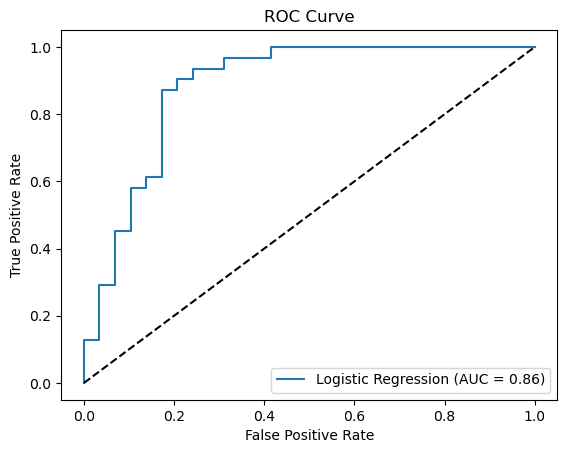

Coefficients: [[ 0.015564   -1.4295535   0.83798197 -0.02697774  0.27366298  0.02846803
  -0.55889096 -0.63598455  0.56628487 -1.14965238 -0.9985205 ]]


In [22]:
# Step 1: Data Preprocessing
X = data.drop('disease_presence', axis=1)
y = data['disease_presence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Step 2: Model Training
logistic_model = LogisticRegression(max_iter=1000)  # Set max_iter to a reasonable value
logistic_model.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Step 4: Interpretation (coefficients, odds ratios)
print("Coefficients:", logistic_model.coef_)


## interpreting this data

1. Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. 

In our case, 

for class 0 (no disease), the precision is 0.83,

for class 1 (has disease), the precision is 0.90. 

This means that among the instances predicted as class 0, 83% were actually class 0, and among the instances predicted as class 1, 90% were actually class 1.

## analysing coefficients in depth.

| Feature                   | Coefficient |
|---------------------------|-------------|
| age_in_years              | 0.0156      |
| gender                    | -1.4296     |
| chest_pain_type           | 0.8380      |
| resting_blood_pressure    | -0.0270     |
| resting_ecg_results       | 0.2737      |
| max_heart_rate_achieved   | 0.0285      |
| exercise_induced_angina   | -0.5589     |
| st_depression             | -0.6360     |
| peak_exercise_st_slope    | 0.5663      |
| num_major_vessels         | -1.1497     |
| thalassemia               | -0.9985     |


The coefficients also represent the weights assigned to each feature by the logistic regression model. These weights indicate the strength and direction of the relationship between each feature and the log-odds of the target variable (disease presence). Here's a more in-depth explanation of the coefficients:

1. **age_in_years**: The coefficient is 0.0156, indicating that for each one-unit increase in age, the log-odds of having the disease increases by approximately 0.0156 units, assuming all other variables are held constant.

2. **gender**: The coefficient is -1.4296. Since gender is typically encoded as 0 for male and 1 for female, this negative coefficient suggests that being female (gender = 1) is associated with a lower log-odds of having the disease compared to being male (gender = 0).

3. **chest_pain_type**: The coefficient is 0.8380. This positive coefficient suggests that as the chest pain type increases, the log-odds of having the disease also increase.

4. **resting_blood_pressure**: The coefficient is -0.0270. This suggests that for each one-unit increase in resting blood pressure, the log-odds of having the disease decrease slightly.

5. **resting_ecg_results**: The coefficient is 0.2737. As the resting electrocardiographic results change, the log-odds of having the disease increase.

6. **max_heart_rate_achieved**: The coefficient is 0.0285. This indicates that for each one-unit increase in the maximum heart rate achieved, the log-odds of having the disease increase slightly.

7. **exercise_induced_angina**: The coefficient is -0.5589. This negative coefficient suggests that the presence of exercise-induced angina is associated with a lower log-odds of having the disease.

8. **st_depression**: The coefficient is -0.6360. This suggests that for each one-unit increase in ST depression induced by exercise relative to rest, the log-odds of having the disease decrease.

9. **peak_exercise_st_slope**: The coefficient is 0.5663. As the peak exercise ST segment slope changes, the log-odds of having the disease increase.

10. **num_major_vessels**: The coefficient is -1.1497. This negative coefficient suggests that as the number of major vessels (0-3) colored by fluoroscopy increases, the log-odds of having the disease decrease.

11. **thalassemia**: The coefficient is -0.9985. As thalassemia category changes, the log-odds of having the disease decrease.

These coefficients provide insight into how each feature contributes to the logistic regression model's prediction of disease presence. 

Positive coefficients indicate a positive association with disease presence, while negative coefficients indicate a negative association. The magnitude of the coefficient reflects the strength of the association.

In [5]:
# Get the list of feature names
feature_names = X.columns.tolist()

# Initialize and train Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Plot the decision tree with improved readability
plt.figure(figsize=(75, 125))
plot_tree(decision_tree, feature_names=feature_names, class_names=['No Disease', 'Disease'], filled=True, fontsize=20, max_depth=10)
plt.show()


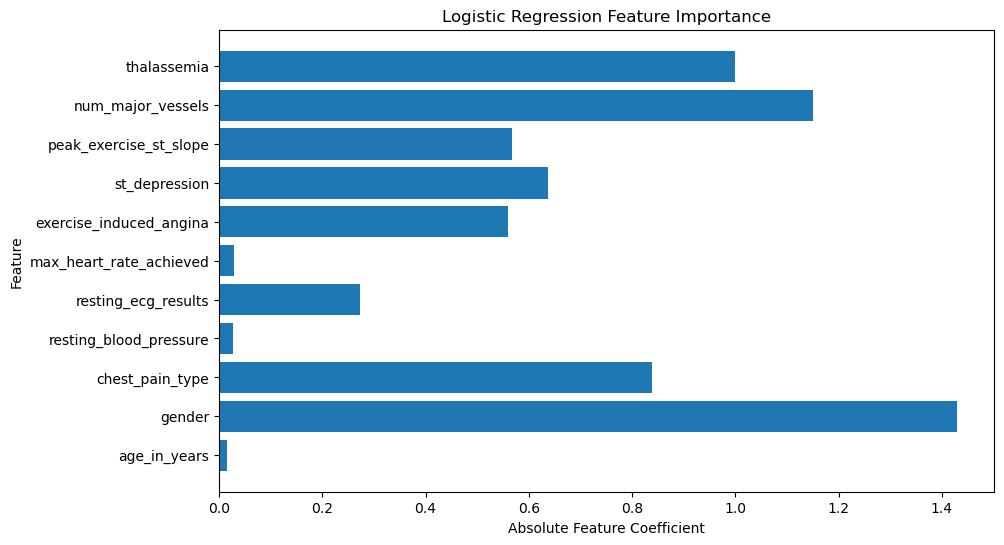

In [6]:
# Feature Importance for Logistic Regression
feature_importance_lr = np.abs(logistic_model.coef_[0])
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_lr)
plt.xlabel('Absolute Feature Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.show()

## it is quite surprising result of feature importance.

we have age is a big factor in deciding whether one has disease. however, this logistic regression seem to place almost so weightage on max heart rate, blood pressure and age, essentially ignoring these variables.

this maybe because logistic regression assumes a linear relationship between the features and the log-odds of the target variable. This suggest that the 3 variables have higher order relation, which isnt accounted for and renders the model more inaccurate.

# Confusion Matrix

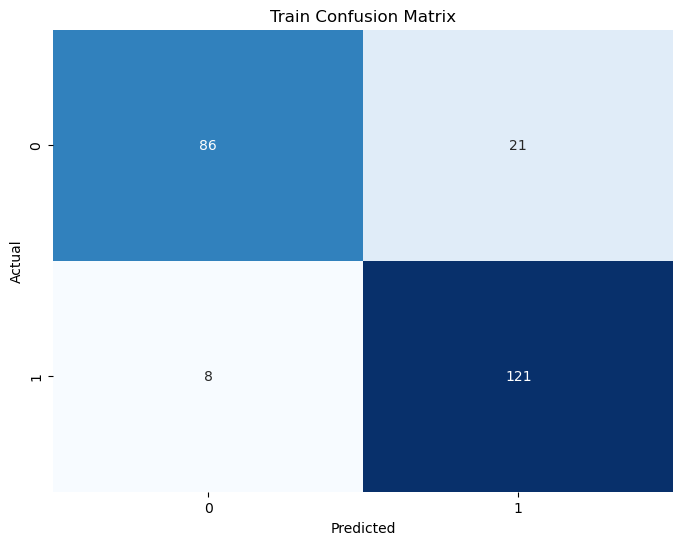

Train Accuracy: 0.8771186440677966
Train False Positive Rate (FPR): 0.19626168224299065
Train True Positive Rate (TPR): 0.937984496124031
Train False Negative Rate (FNR): 0.06201550387596899
Train True Negative Rate (TNR): 0.8037383177570093


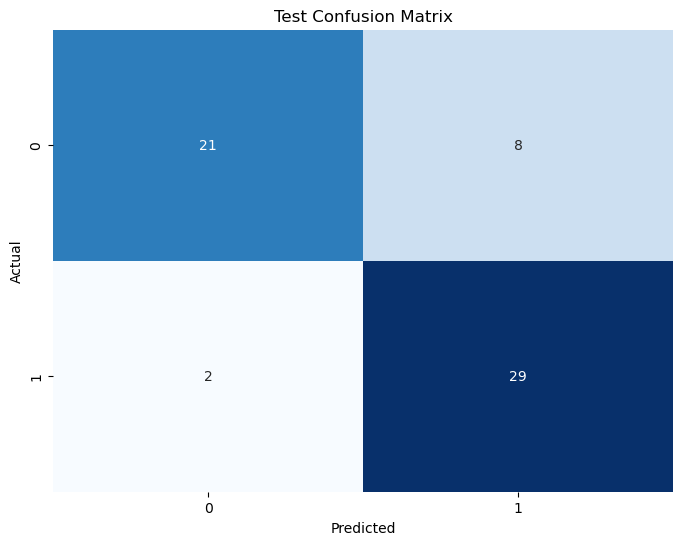

Test Accuracy: 0.8333333333333334
Test False Positive Rate (FPR): 0.27586206896551724
Test True Positive Rate (TPR): 0.9354838709677419
Test False Negative Rate (FNR): 0.06451612903225806
Test True Negative Rate (TNR): 0.7241379310344828


In [7]:
def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Extract TP, TN, FP, FN from the confusion matrix
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    
    # Calculate accuracy, false positive rate (FPR), true positive rate (TPR),
    # false negative rate (FNR), and true negative rate (TNR)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    FNR = FN / (FN + TP)
    TNR = TN / (TN + FP)
    
    return conf_matrix, accuracy, FPR, TPR, FNR, TNR

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
    
# Calculate metrics and plot confusion matrix for train data
conf_matrix_train, accuracy_train, FPR_train, TPR_train, FNR_train, TNR_train = calculate_metrics(y_train, logistic_model.predict(X_train))
plot_confusion_matrix(conf_matrix_train, 'Train Confusion Matrix')

# Display calculated metrics for train data
print("Train Accuracy:", accuracy_train)
print("Train False Positive Rate (FPR):", FPR_train)
print("Train True Positive Rate (TPR):", TPR_train)
print("Train False Negative Rate (FNR):", FNR_train)
print("Train True Negative Rate (TNR):", TNR_train)

# Calculate metrics and plot confusion matrix for test data
conf_matrix_test, accuracy_test, FPR_test, TPR_test, FNR_test, TNR_test = calculate_metrics(y_test, y_pred)
plot_confusion_matrix(conf_matrix_test, 'Test Confusion Matrix')

# Display calculated metrics for test data
print("Test Accuracy:", accuracy_test)
print("Test False Positive Rate (FPR):", FPR_test)
print("Test True Positive Rate (TPR):", TPR_test)
print("Test False Negative Rate (FNR):", FNR_test)
print("Test True Negative Rate (TNR):", TNR_test)

# remarks on confusion matrix:

Overall, the model demonstrates good performance, with high TPR and TNR and relatively low FPR and FNR, suggesting it is effectively capturing the underlying patterns in the data. 

# random forest coding

## Random forest: how does it work?

Random Forest creates multiple decision trees using random subsets of the data and features. Each tree individually predicts the outcome, and the final prediction is determined by a majority vote of all trees' predictions. This ensemble approach improves accuracy and reduces overfitting compared to a single decision tree.


### more in-depth for our own insights on how it works
Choose random samples: Random Forest begins by creating multiple bootstrap samples from the original dataset. Each sample is obtained by randomly selecting data points with replacement. This process generates diverse subsets, allowing different trees to see different variations of the data.

Decision Tree: For each bootstrap sample, a decision tree is constructed. However, Random Forest introduces randomness during the tree-building process. At each node, instead of considering all features, a random subset of features is considered for splitting. This introduces diversity among the trees, preventing them from being overly correlated.

Voting (Classification) or Averaging (Regression): Once all decision trees are constructed, they collectively make predictions. In the case of classification, each tree ‘votes’ for a class, and the class with the majority of votes becomes the final prediction. For regression, the predictions from all trees are averaged to obtain the final output.
Evaluation: Choose the predicted result that received the most votes to be the final outcome.


## hyperparameter tuning

RandomizedSearchCV optimizes the RandomForestClassifier by searching over specified parameter distributions using random combinations, with cross-validation for evaluation. It returns the best combination of parameters and the corresponding best estimator for the model.

## why is it necessary?

is needed to improve its performance and generalization ability on unseen data. These hyperparameters are settings that are not learned during training but rather set prior to training and can significantly impact the model's behavior and performance. Tuning involves systematically searching for the best combination of hyperparameters to achieve the best model performance.

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter distribution
param_dist = {
    'max_depth': list(range(5, 10)),  # Set the range of max_depth to 5 and 10
    'min_samples_split': list(range(5,8)),
    'min_samples_leaf': [3,4, 5, 6]  
}

# Define the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=35)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=60, cv=5, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 6}


Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.81      0.94      0.87        31

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60

ROC-AUC Score: 0.8884171301446051


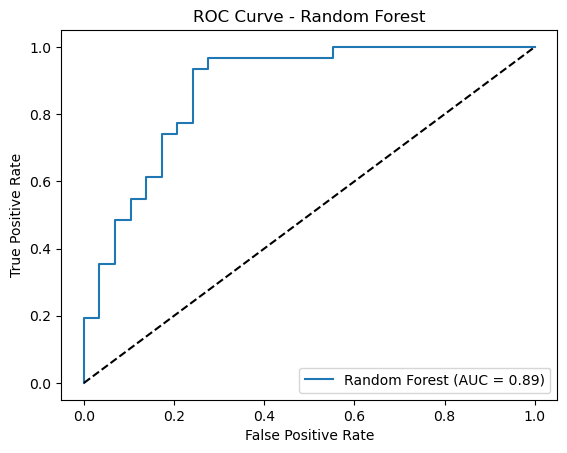

In [27]:
# Initialize Random Forest classifier with best parameters 
random_forest = RandomForestClassifier(**best_params, n_estimators=40, random_state=35)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))

# Calculate ROC-AUC
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC Score:", roc_auc_rf)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

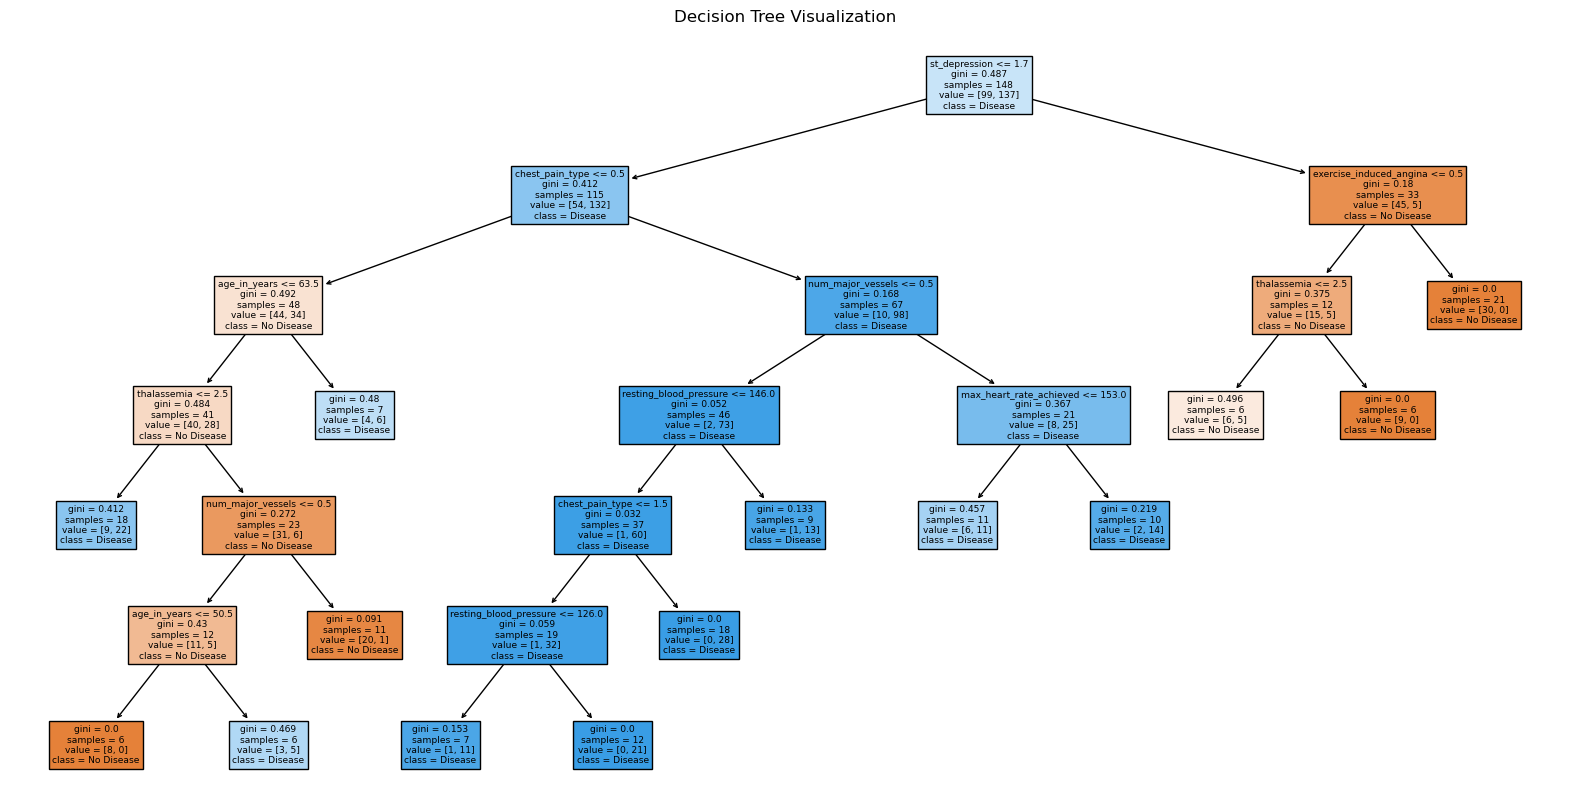

In [10]:
# Define the index of the decision tree you want to visualize
tree_index = 0  # You can change this index to visualize different trees

# Access the decision tree from the Random Forest
decision_tree = random_forest.estimators_[tree_index]

# Convert Index object to list for feature names
feature_names_list = list(X_train.columns)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=feature_names_list, class_names=['No Disease', 'Disease'])
plt.title('Decision Tree Visualization')
plt.show()

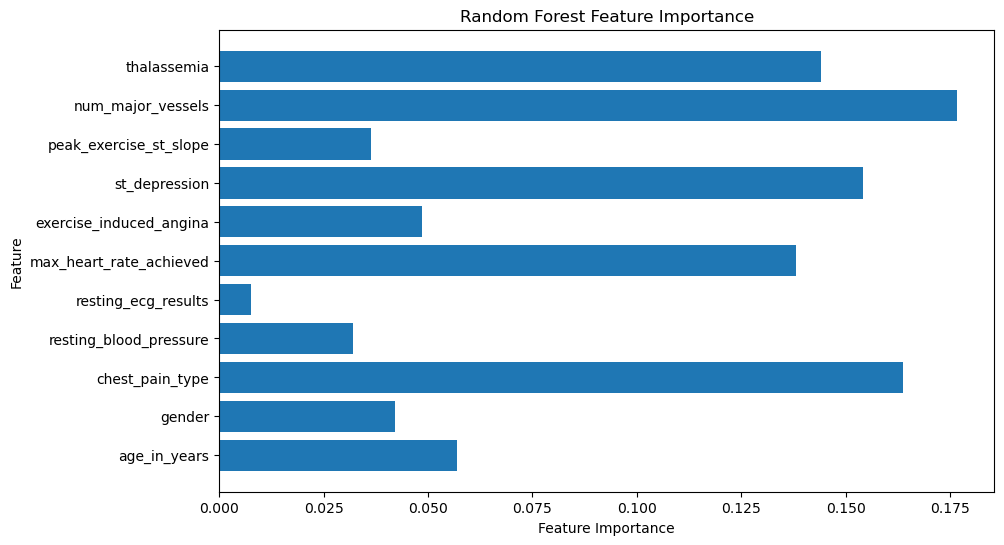

In [11]:
# Feature Importance
feature_importance_rf = random_forest.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_rf)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

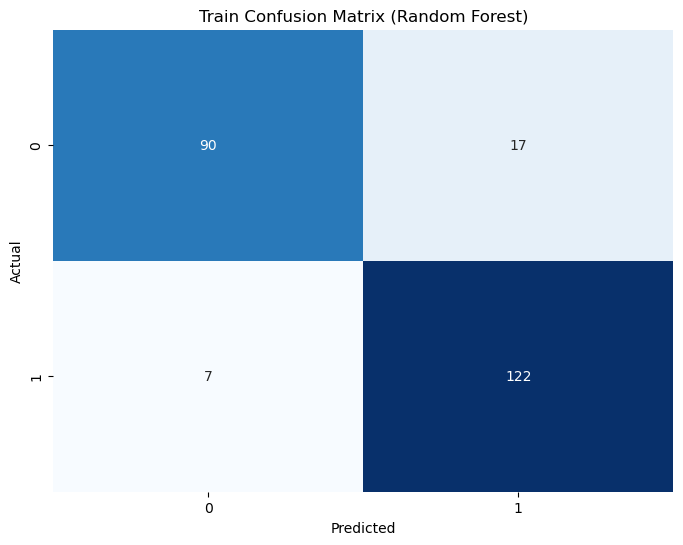

Train Accuracy (Random Forest): 0.8983050847457628
Train False Positive Rate (FPR) (Random Forest): 0.9457364341085271
Train True Positive Rate (TPR) (Random Forest): 0.1588785046728972
Train False Negative Rate (FNR) (Random Forest): 0.05426356589147287
Train True Negative Rate (TNR) (Random Forest): 0.8411214953271028


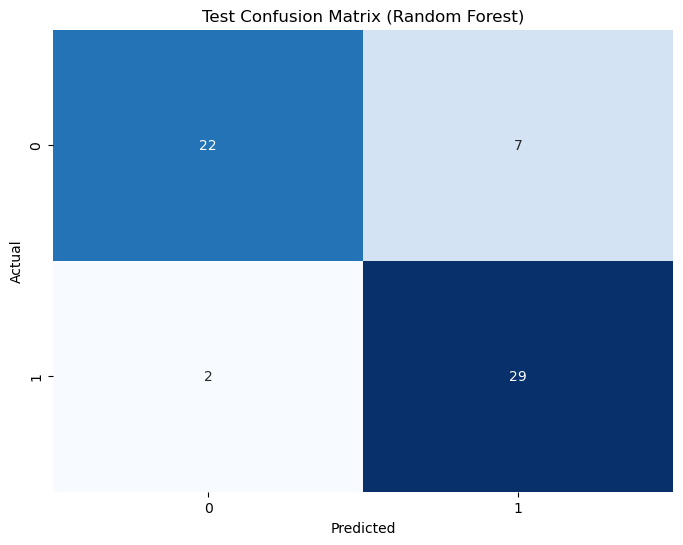

Test Accuracy (Random Forest): 0.85
Test False Positive Rate (FPR) (Random Forest): 0.9354838709677419
Test True Positive Rate (TPR) (Random Forest): 0.2413793103448276
Test False Negative Rate (FNR) (Random Forest): 0.06451612903225806
Test True Negative Rate (TNR) (Random Forest): 0.7586206896551724


In [31]:
# Calculate metrics and plot confusion matrix for train data with random forest
conf_matrix_train_rf, accuracy_train_rf, FPR_train_rf, TPR_train_rf, FNR_train_rf, TNR_train_rf = calculate_metrics(y_train, random_forest.predict(X_train))
plot_confusion_matrix(conf_matrix_train_rf, 'Train Confusion Matrix (Random Forest)')

# Display calculated metrics for train data with random forest
print("Train Accuracy (Random Forest):", accuracy_train_rf)
print("Train False Positive Rate (FPR) (Random Forest):", FPR_train_rf)
print("Train True Positive Rate (TPR) (Random Forest):", TPR_train_rf)
print("Train False Negative Rate (FNR) (Random Forest):", FNR_train_rf)
print("Train True Negative Rate (TNR) (Random Forest):", TNR_train_rf)

# Calculate metrics and plot confusion matrix for test data with random forest
conf_matrix_test_rf, accuracy_test_rf, FPR_test_rf, TPR_test_rf, FNR_test_rf, TNR_test_rf = calculate_metrics(y_test, y_pred_rf)
plot_confusion_matrix(conf_matrix_test_rf, 'Test Confusion Matrix (Random Forest)')

# Display calculated metrics for test data with random forest
print("Test Accuracy (Random Forest):", accuracy_test_rf)
print("Test False Positive Rate (FPR) (Random Forest):", FPR_test_rf)
print("Test True Positive Rate (TPR) (Random Forest):", TPR_test_rf)
print("Test False Negative Rate (FNR) (Random Forest):", FNR_test_rf)
print("Test True Negative Rate (TNR) (Random Forest):", TNR_test_rf)


# Support Vector Machines (SVM) coding

## how does it work?

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

 It works by maximizing the margin between the classes, which helps improve its generalization ability.



In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_dist = {
    'C': [0.1,1, 10, 100, 1000],  # Increased range for C
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf'],  # Kernel types
    'degree': [2, 3],  # Degrees for polynomial kernel
    'class_weight': [None, 'balanced']  # Class weight
}

# Initialize the SVM classifier
svm = SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=50, cv=3, random_state=25, n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Use the best estimator for prediction and evaluation
y_pred_svm = best_estimator.predict(X_test)

# Evaluate the model
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'class_weight': 'balanced', 'C': 0.1}
Accuracy: 0.8166666666666667


Support Vector Machine Model Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        29
           1       0.83      0.94      0.88        31

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60

ROC-AUC Score: 0.8748665183537264


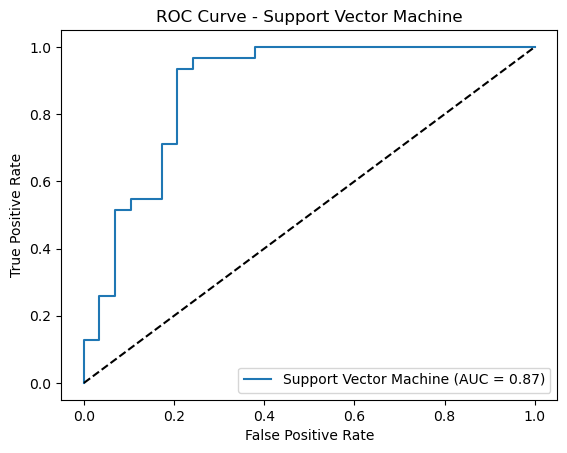

In [24]:
# Initialize Support Vector Machine classifier with specified parameters
svm = SVC(C=1, kernel='linear', gamma='auto', degree = 2, class_weight = 'balanced',random_state=39)

# Fit the SVM classifier to the training data
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Support Vector Machine Model Evaluation:")
print(classification_report(y_test, y_pred_svm))

# Calculate ROC-AUC
y_prob_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print("ROC-AUC Score:", roc_auc_svm)

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

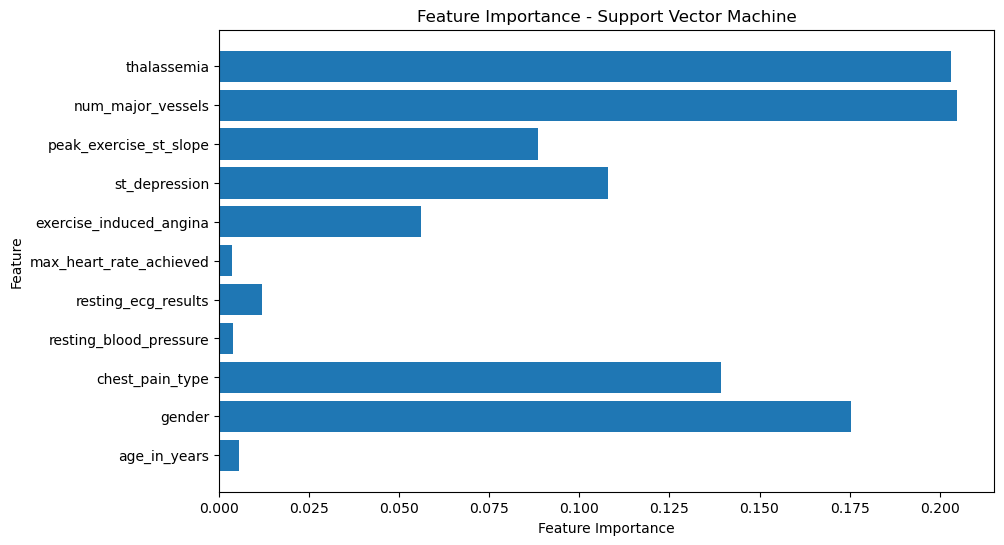

In [15]:
coef_abs = np.abs(svm.coef_[0])
feature_importance_svm = coef_abs / np.sum(coef_abs)  # Normalizing to sum up to 1

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance_svm)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Support Vector Machine')
plt.show()

Test Confusion Matrix:
[[23  6]
 [ 2 29]]
Test Accuracy: 0.8666666666666667
Test True Positive Rate (TPR): 0.9354838709677419
Test False Positive Rate (FPR): 0.20689655172413793
Test False Negative Rate (FNR): 0.06451612903225806
Test True Negative Rate (TNR): 0.7931034482758621


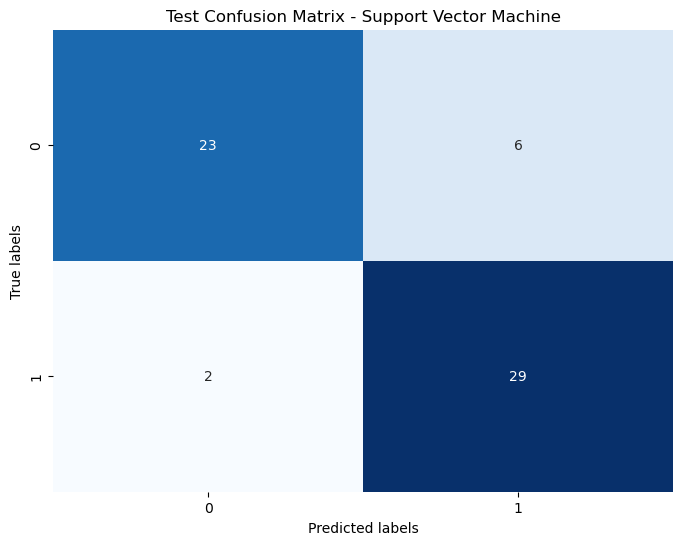

In [16]:
def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate true positive rate (TPR), false positive rate (FPR), false negative rate (FNR), true negative rate (TNR)
    TN, FP, FN, TP = conf_matrix.ravel()
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)
    TNR = TN / (TN + FP)
    
    return conf_matrix, accuracy, TPR, FPR, FNR, TNR

# Calculate metrics for test set
conf_matrix_svm, accuracy_svm, TPR_svm, FPR_svm, FNR_svm, TNR_svm = calculate_metrics(y_test, y_pred_svm)

# Print confusion matrix for test set
print("Test Confusion Matrix:")
print(conf_matrix_svm)

# Print accuracy for test set
print("Test Accuracy:", accuracy_svm)

# Print TPR, FPR, FNR, TNR for test set
print("Test True Positive Rate (TPR):", TPR_svm)
print("Test False Positive Rate (FPR):", FPR_svm)
print("Test False Negative Rate (FNR):", FNR_svm)
print("Test True Negative Rate (TNR):", TNR_svm)

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title('Test Confusion Matrix - Support Vector Machine')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


# analysing all 3 models:

\

## 1. Logistic Regression

Test Accuracy: 0.8333333333333334

Test False Negative Rate (FNR): 0.06451612903225806

Test False Positive Rate (FPR): 0.27586206896551724

Test True Positive Rate (TPR): 0.9354838709677419

Test True Negative Rate (TNR): 0.7241379310344828

ROC-AUC Score: 0.8632035595105674

\

## 2. Random Forest

Test Accuracy: 0.85

Test False Negative Rate (FNR): 0.06451612903225806

Test False Positive Rate (FPR) : 0.2413793103448276

Test True Positive Rate (TPR) : 0.9354838709677419


Test True Negative Rate (TNR) : 0.7586206896551724

ROC-AUC Score: 0.8884171301446051

\

## 3. Support vector machine SVM

Test Accuracy: 0.8688524590163934

Test False Negative Rate (FNR): 0.13157894736842105

Test True Positive Rate (TPR): 0.868421052631579

Test False Positive Rate (FPR): 0.13043478260869565

Test True Negative Rate (TNR): 0.8695652173913043

ROC-AUC Score: 0.8748665183537264

In [18]:
new_data = pd.DataFrame({
    'age_in_years': [41],
    'gender': [0],
    'chest_pain_type': [3],
    'resting_blood_pressure': [145],
    'resting_ecg_results': [1],
    'max_heart_rate_achieved': [150],
    'exercise_induced_angina': [0],
    'st_depression': [1.4],
    'peak_exercise_st_slope': [2],
    'num_major_vessels': [0],
    'thalassemia': [2]
})

predict_if_got_disease(new_data)

Prediction: Disease is present
Confidence Level: 85.62%


In [19]:
new_data = pd.DataFrame({
    'age_in_years': [50],
    'gender': [1],
    'chest_pain_type': [0],
    'resting_blood_pressure': [0],
    'resting_ecg_results': [1],
    'max_heart_rate_achieved': [154],
    'exercise_induced_angina': [2],
    'st_depression': [2],
    'peak_exercise_st_slope': [0],
    'num_major_vessels': [0],
    'thalassemia': [0]
})

predict_if_got_disease(new_data)

Prediction: Disease is not present
Confidence Level: 99.85%


# Project Reflection: Learning Journey of Our Mini Project

Throughout our collaborative project, we embarked on a journey through the realm of data science, where we delved into various machine learning models, honed our skills in model evaluation and optimization, and developed a deeper understanding of statistical techniques. Here's a reflection on our collective learning experience:


# Technical Skills:
1. Our exploration began with the foundation of machine learning models, where we familiarized ourselves with Logistic Regression, Random Forest, and Support Vector Machines (SVM). Each model brought its unique approach to solving classification problems, and we learned to discern the most suitable one based on the data characteristics and objectives.

2. Hyperparameter tuning emerged as a crucial aspect of model optimization, allowing us to fine-tune the performance of our algorithms using techniques like Randomized Search Cross-Validation. This skill empowered us to achieve higher accuracy and robustness in our models.

3. As we delved deeper, we uncovered the importance of evaluation metrics in assessing model performance. Metrics such as accuracy, precision, recall, and ROC-AUC provided us with valuable insights into the effectiveness of our models and guided our decision-making process.

4. Interpreting feature importance became a pivotal skill as we analyzed the impact of different variables on our predictions. Understanding which features drive model decisions enriched our understanding of the underlying data dynamics.

Our journey also led us through the intricacies of data preprocessing, where we learned to prepare our data for modeling by handling categorical variables, scaling features, and splitting data into training and testing sets.

# Soft Skills:
1. Collaboration played a central role in our project, as we navigated through tasks and challenges together. Platforms like GitHub facilitated seamless collaboration, allowing us to synchronize efforts and contribute to the project effectively.

2. Effective communication emerged as a cornerstone of our success, as we articulated complex concepts and findings in a clear and concise manner. Our ability to communicate insights and recommendations to stakeholders proved invaluable in driving project outcomes.

3. Problem-solving became second nature to us as we encountered and resolved challenges throughout the project. Whether it was optimizing model performance or interpreting results, our problem-solving skills were put to the test and strengthened along the way.

Adaptability was a key attribute that enabled us to navigate through evolving project requirements and tasks. Our ability to pivot and adjust our approach ensured that we remained agile and responsive to changing needs.

# New Concepts:
1. Our journey introduced us to a plethora of new concepts, including statistical tests like ANOVA and t-test, which provided us with valuable tools for analyzing differences in data and assessing significance.

2. We explored the intricacies of Random Forest, an ensemble learning technique renowned for its robustness and effectiveness in predictive modeling. Random Forest emerged as a powerful tool for handling complex datasets and improving predictive accuracy.

3. Support Vector Machines (SVM) captivated us with its ability to tackle binary classification tasks in high-dimensional spaces. SVMs proved to be invaluable in scenarios with intricate decision boundaries, where they excelled in capturing complex patterns in the data.

# Conclusion:
Our collaborative project journey in data science has been enriching and rewarding, as we honed our technical skills, developed essential soft skills, and explored new concepts and technologies. We're excited to apply our newfound knowledge and expertise in future projects, confident in our ability to tackle complex challenges and drive impactful outcomes in the field of data science.

## As we embark on our individual paths, we carry with us the lessons learned and experiences shared, knowing that our journey in data science is a continuous evolution of learning and growth.

### Together, we've laid the foundation for success, and the possibilities that lie ahead are boundless. Here's to our collective journey and the transformative impact we'll continue to make in the world of data science.